In [1]:
import os
import sys
import cProfile
import time as t

import matplotlib.pyplot as plt
plt.style.use('/global/u2/f/fnafis/nfuad.mpl')

import numpy as np
import scipy as scp
from itertools import compress



from pygama.vis.waveform_browser import WaveformBrowser as wfb
import pygama.lh5 as lh5
from pygama.flow import DataGroup

from scipy.optimize import curve_fit
def func(x,mu,sig):
    return 0.5*(1+scp.special.erf((x-mu)/(sig*np.sqrt(2))))
def func2(x,mu,sig,amp):
    return amp*0.5*(1+scp.special.erf((x-mu)/(sig*np.sqrt(2))))

def erf_fit_scipy_2(time, wf):
    #fNSamplesToIntegrate = wf.shape[0]-1
    
    #amp = np.mean(wf[wf.shape[0]-1-fNSamplesToIntegrate:wf.shape[0]-1])
    pars, covs = curve_fit(func2,time,wf)
    
    return pars[0],pars[1],pars[2]



dg = DataGroup('/global/homes/f/fnafis/krstc/krstc.json', load=True)



ModuleNotFoundError: No module named 'pygama.io'

In [1]:
from pygama.flow import DataGroup
import pygama.lgdo.lh5_store as lh5


dg = DataGroup('/global/homes/f/fnafis/krstc/krstc.json', load=True)



ModuleNotFoundError: No module named 'pygama.flow'

## Load files

In [11]:
beginning_cyc = 2019
cyc_range = [2038,2059, 'kr', 'run3']
#cyc_range = [2028,2028, 'bkg', 'run2']



tb_name_dsp = 'ORSIS3302DecoderForEnergy/dsp'

lh5_dir = dg.lh5_dir
dsp_list = lh5_dir + dg.fileDB['dsp_path'] + '/' + dg.fileDB['dsp_file']
hit_list = dsp_list[cyc_range[0]-beginning_cyc:cyc_range[1]-beginning_cyc+1]

df_hit = lh5.load_dfs(hit_list, ['dcr','trapEmax','bl','tp_0','tp_20', 'tp_50'], tb_name_dsp)

#df_hit = lh5.load_dfs(hit_list, ['dcr','trapEmax','bl', 'erf_fit_mu', 'erf_fit_sig', 'erf_fit_amp'], tb_name_dsp)


current_pars = [0.430, -0.09979]
df_hit['trapEmax_cal'] = np.polyval(current_pars, df_hit['trapEmax'])


#getting raw files too, for wfs
raw_files = []
tb_name_raw = 'ORSIS3302DecoderForEnergy/raw'
for cyc in range(cyc_range[0],cyc_range[1]+1):
    raw_files.append('/global/cfs/cdirs/legend/data/krstc/LH5/raw/krstc_'+cyc_range[3]+'_cyc'+str(cyc)+'_raw.lh5')


trapEmax_cal_range = [0.0,50.0] #keV

df_hit[0:20]

,dcr,trapEmax,bl,tp_0,tp_20,tp_50,trapEmax_cal
0,0.571185,991.406067,58085.121094,39780.0,40040.0,40160.0,426.204834
1,0.392808,1267.430786,58085.140625,39700.0,40370.0,40500.0,544.895447
2,0.334521,321.849457,58084.574219,39300.0,40110.0,40220.0,138.295471
3,0.600615,248.719040,58079.394531,39700.0,39930.0,40060.0,106.849396
4,0.477945,783.526733,58085.335938,39700.0,40210.0,40330.0,336.816711
5,0.436020,2712.315674,58083.339844,39810.0,40380.0,40510.0,1166.196045
6,0.310970,445.077637,58087.089844,39280.0,40120.0,40250.0,191.283600
7,0.383134,318.254333,58085.511719,39290.0,40000.0,40120.0,136.749573
8,0.527043,242.837067,58084.785156,39630.0,40020.0,40150.0,104.320145
9,0.386436,922.883362,58072.707031,39550.0,40220.0,40350.0,396.740051


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


/tmp/ipykernel_36086/120710132.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  a = plt.hist2d(dcr, E, bins=(100,100), range=((0,1),(trapEmax_cal_range[0],trapEmax_cal_range[1])))


Text(0, 0.5, 'e_cal')

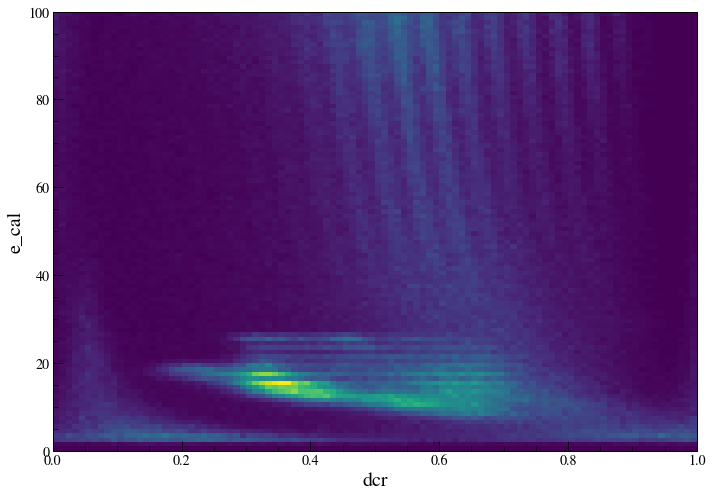

In [49]:

trapEmax_cal_range = [0.0,100.0] #keV

ene_cut = (df_hit['trapEmax_cal']>trapEmax_cal_range[0]) & (df_hit['trapEmax_cal']<trapEmax_cal_range[1])





dcr = df_hit['dcr'][ene_cut]



E = df_hit['trapEmax_cal'][ene_cut]
print(type(dcr))
print(type(E))

a = plt.hist2d(dcr, E, bins=(100,100), range=((0,1),(trapEmax_cal_range[0],trapEmax_cal_range[1])))
plt.xlabel('dcr')
plt.ylabel('e_cal')



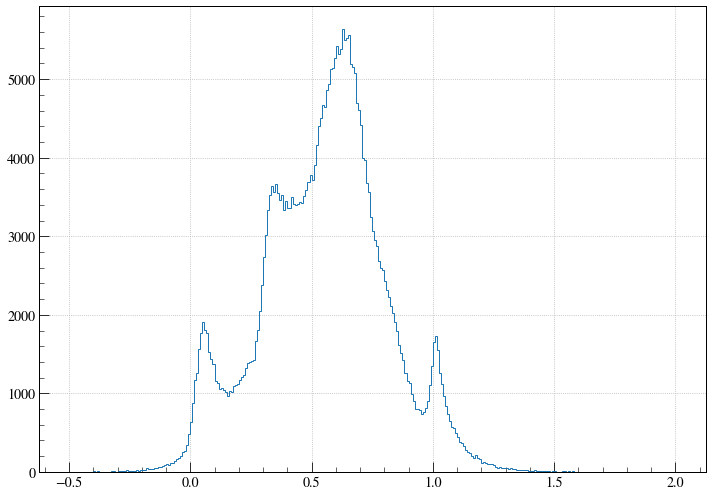

In [39]:
n = plt.hist(dcr, range=[-0.5,2], bins=300, histtype='step')

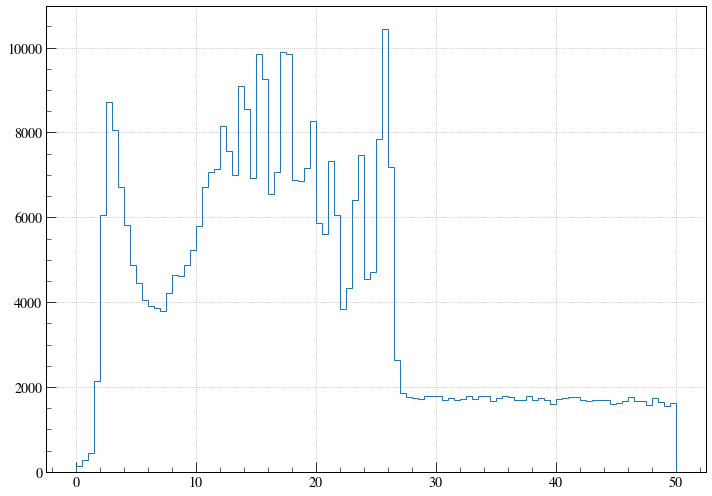

In [41]:
m = plt.hist(E, bins=100, range=(0,50), histtype='step')

/tmp/ipykernel_36086/869748443.py:1: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  a = plt.hist2d(dcr, E, bins=(100,100), range=((0,1),(0,50)))


Text(0, 0.5, 'e_cal')

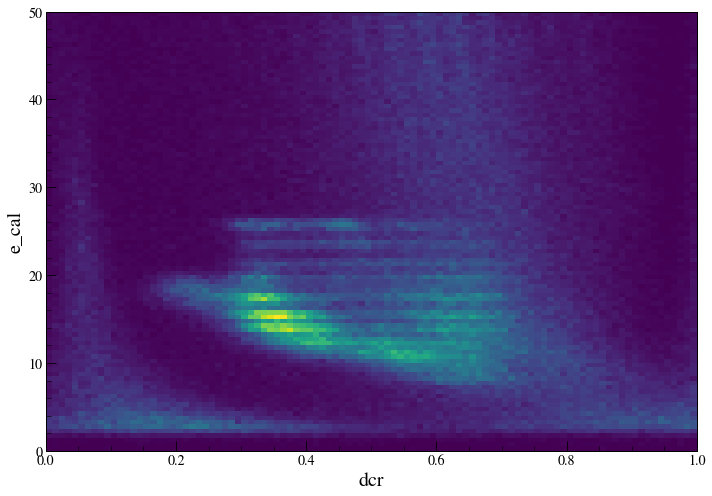

## Getting wfs [bl subtracted, pole zero corrected]

901
aaaaaa
Processing parameters: ['bl, bl_sig, bl_slope, bl_int', 'wf_blsub', 'wf_pz']
Required input parameters: ['waveform']
Copied output parameters: []
Processed output parameters: ['wf_pz']
['bl, bl_sig, bl_slope, bl_int', 'wf_blsub', 'wf_pz']
Database lookup: using default value of 74.00*us for db.pz2.tau1
Database lookup: using default value of 6.4*us for db.pz2.tau2
Database lookup: using default value of 0 for db.pz2.frac
[20105]


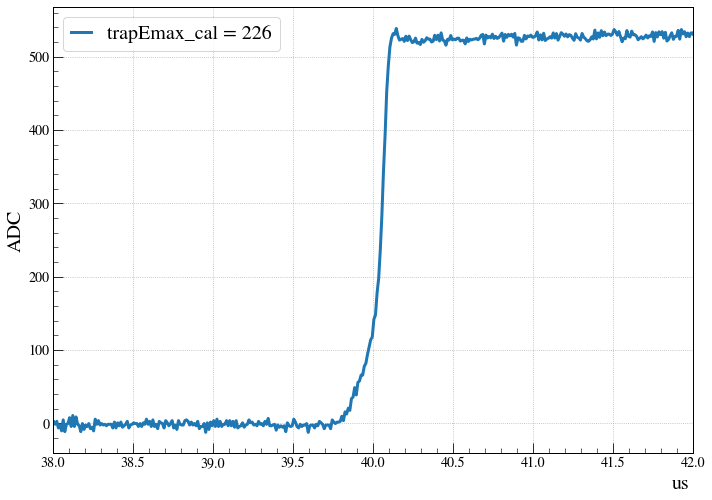

In [12]:
bl_range = [58000,58200, 'ADC']
e_cal_range = [225,229, 'keV']


bl_cut =(df_hit['bl']>=bl_range[0]) & (df_hit['bl']<bl_range[1]) 

ene_cut = (df_hit['trapEmax_cal']>e_cal_range[0]) & (df_hit['trapEmax_cal']<e_cal_range[1])

cut = bl_cut & ene_cut
print(cut.sum())

legend = (df_hit['trapEmax_cal'])

wf_browser = wfb(raw_files, tb_name_raw, 
                dsp_config=os.path.expandvars('$HOME/KrSTC/data/meta/config_dsp.json'),
                waveforms=['wf_pz'], 
                #waveforms=['wf_pz','wf_trap', 'wf_blsub'],
                x_unit='us',
                #selection = cut,
                x_lim=(38,42),
                legend=legend)

nwfs = 1
cut_indices = list(compress(list(range(len(cut))),cut))
entries = np.random.choice(cut_indices, size=nwfs).tolist() #randomly chosen nwfs events
#entries = list(range(nwfs)) #first nwfs events
print(entries)
wf_browser.draw_entry(entries) #how do I get the wfs without plotting them? ans: use wf_browser.find_entry(entries)
plt.ylabel('ADC')

time = wf_browser.wf_data[0][0][0]*1000
wf = wf_browser.wf_data[0][0][1]

In [12]:
list(zip(time, wf))[0:10]

[(0.0, 3.9375),
 (10.001220852154805, 0.9380321),
 (20.00244170430961, -0.061841216),
 (30.003662556464416, -11.06185),
 (40.00488340861922, -2.0633445),
 (50.00610426077402, -6.0636234),
 (60.00732511292883, -2.0644426),
 (70.00854596508363, 1.9352788),
 (80.00976681723844, -1.0644594),
 (90.01098766939324, -0.06460304)]

In [6]:
wf_browser.wf_data[0][0]

(array([0.00000000e+00, 1.00012209e-02, 2.00024417e-02, ...,
        8.18999976e+01, 8.19099988e+01, 8.19200000e+01]),
 array([ -0.671875 ,   1.3280342,  -1.6717863, ..., 515.4235   ,
        505.46277  , 224.50064  ], dtype=float32))

In [7]:
time = wf_browser.wf_data[0][0][0]
raw_wf = wf_browser.wf_data[0][0][1]
wf_pz = wf_browser.wf_data[1][0][1]
wf_trap = wf_browser.wf_data[2][0][1]
wf_blsub = wf_browser.wf_data[3][0][1]

IndexError: list index out of range

In [ ]:
wf_browser_2 = wfb(raw_files, tb_name_raw, 
                dsp_config=os.path.expandvars('$HOME/KrSTC/data/meta/config_dsp.json'),
                #waveforms=['wf_pz'], 
                waveforms=['wf_pz'],
                x_unit='us',
                #selection = cut,
                x_lim=(38,42),
                legend=legend)
wf_browser_2.find_entry([0,1,2])
wfs_pz = []
for i in range(3):
    wfs_pz.append(wf_browser_2.wf_data[0][i][1])
    
wfs_pz

In [ ]:
type(pars[0])

In [ ]:
def func(x,mu,sig,amp):
    return amp*0.5*(1 + scp.special.erf((x-mu)/(sig*np.sqrt(2))))
wf_in = wfs_pz[0]
#@guvectorize(['(float32[:], float64, float64, float64)'], '(n)->(),(),()')
def erf_fit(wf, mu, sig, amp):
    time = np.linspace(0,wf.shape[0]*10, wf.shape[0])
    pars, covs = curve_fit(func, time, wf)
    mu = pars[0]
    sig = pars[1]
    amp = pars[2]
    
    return mu,sig, amp


start = t.time()
pars = [erf_fit(wf,0,0,0) for wf in wfs_pz]
end = t.time()
print(end-start)
print(*pars, sep="\n")

In [ ]:
#plt.plot(time, raw_wf, label='raw wf')
plt.plot(time, wf_blsub, label='wf_blsub')
plt.plot(time, wf_pz, label='wf_pz')
plt.plot(time, wf_trap, label='wf_trap')

mu, sig, amp = erf_fit_scipy_2(time, wf_pz)
plt.plot(time, func2(time,mu,sig, amp), label='erf fit')

plt.legend()
plt.title('trapEmax_cal = 229 KeV')
#plt.xlim(48,58)
#plt.ylim(500,600)



In [ ]:
n = plt.hist(df_hit['trapEmax_cal'][cut], bins=100, histtype='step')

In [ ]:
time = wf_browser.wf_data[0][0][0]
wf = wf_browser.wf_data[0][0][1]
#print(wf.shape)
#plt.plot(time,wf)
#plt.xlim(38,42)

In [ ]:
sys.getsizeof(wf)/1024

In [ ]:

fNSamplesToIntegrate = 1000

#normalizing the wf btwn [0:1]
'''
amp = 0
for i in range(fNSamplesToIntegrate):
    amp = amp + wf[wf.shape[0]-1-i]
amp = amp / fNSamplesToIntegrate
print('avg amplitude: ',amp)
'''
amp = np.mean(wf[wf.shape[0]-fNSamplesToIntegrate:wf.shape[0]])

wf_normalized = wf/amp



plt.plot(time, wf_normalized)
plt.xlim(38,42)

## erf_fit jdet

In [4]:
entries[0]

35357

In [ ]:
tp50 = df_hit['tp_50'][entries[0]]
tp20 = df_hit['tp_20'][entries[0]]
tp0 = df_hit['tp_0'][entries[0]]
sig = (tp50-tp20)/2
print(sig)

In [14]:
time

array([0.00000000e+00, 1.00012209e+01, 2.00024417e+01, ...,
       8.18999976e+04, 8.19099988e+04, 8.19200000e+04])

erf_fit_iminuit: 40032.37 57.142094 522.40247
erf_fit_jdet: 40000.974987871916 10.904492202226528 522.40247


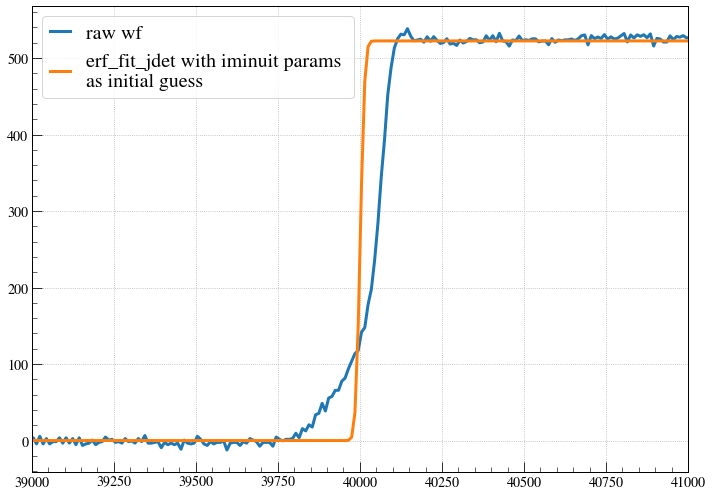

In [13]:
def erf_fit_jdet_pythonic(time, wf, pars_guess=[40000,10], fNSamplesToIntegrate=1000):
    #print(list(zip(time,wf))[0:10])
    iMu = int(pars_guess[0]/10)
    iSig = int(pars_guess[1]/10)
    
    #iMu = int(tp50/10)
    #iSig= int(sig/10)
    
    
    iMin = 0
    iMax = wf.shape[0]-1

    iMuLast = iMu
    iSigLast = iSig


    iMuMin = 3900
    iMuMax = 4200
    
    iSigMin = 0.1
    iSigMax = 200

    iMuTol = 2
    iSigTol = 2

    chi2 = 0
    
    fNIterMax = 20
    fNStepsToRamp = 5
    
    amp = np.mean(wf[wf.shape[0]-1-fNSamplesToIntegrate:wf.shape[0]-1])
    
    for iIter in range(fNIterMax):
    
        i = np.arange(iMin, iMax)
        x = (i- iMu)/iSig
        f = 0.5*(1+ scp.special.erf(x/np.sqrt(2)))
        d = wf[i]/amp - f
        chi2 = (d*d).sum()

        g = np.exp(-x*x/2)
        dg = (d*g).sum()
        dgx = (d*g*x).sum()
        dgx2 = (d*g*x*x).sum()
        dgx3 = (d*g*x*x*x).sum()
        g2 = (g*g).sum()
        g2x = (g*x*x).sum()
        g2x2 = (g*g*x*x).sum()

        gnorm = 1/np.sqrt(2*np.pi)/iSig
        g2 *= gnorm
        g2x *= gnorm
        g2x2 *= gnorm

        H11 = g2 + dgx/iSig
        H12 = g2x + dgx2/iSig - dg/iSig
        H22 = g2x2 + dgx3/iSig - 2*dgx/iSig
        detH = H11*H22 - H12*H12

        stepDownFactor = 1

        if (iIter < fNStepsToRamp):
                stepDownFactor = 1 + fNStepsToRamp - iIter

        iMu -= (H22*dg - H12*dgx)/detH/stepDownFactor
        if (iMu < iMuMin): iMu=iMuMin
        if (iMu >= iMuMax): iMu = iMuMax

        iSig -= (-H12*dg + H11*dgx)/detH/stepDownFactor
        if (iSig < iSigMin): iSig = iSigMin
        if (iSig >= iSigMax): iSig = iSigMax

        if (abs(iMu-iMuLast) < iMuTol) and (abs(iSig-iSigLast) < iSigTol):
            #if verbose: print('\niMu:',iMu, '\niMuLast:',iMuLast, '\niMuTol:',iMuTol)
            break
        iMuLast = iMu
        iSigLast = iSig
        
    return iMu*10, iSig*10, amp

    


mu_iminuit = df_hit['erf_fit_mu'][entries[0]]
sig_iminuit = df_hit['erf_fit_sig'][entries[0]]
amp_iminuit = df_hit['erf_fit_amp'][entries[0]]
print('erf_fit_iminuit:', mu_iminuit,sig_iminuit,amp_iminuit)



mu, sig, amp = erf_fit_jdet_pythonic(time,wf)#, pars_guess=[mu_iminuit,sig_iminuit])
print('erf_fit_jdet:',mu,sig,amp)




y = func(time, mu, sig)
#y_iminuit = func(time, mu_iminuit, sig_iminuit)
plt.plot(time,wf, label='raw wf')
plt.plot(time,(y)*amp, label='erf_fit_jdet with iminuit params \nas initial guess')#pars:{:.1f},{:.1f}'.format(mu,sig))
#plt.plot(time,y_iminuit*amp_iminuit, label='erf_fit_iminuit')#pars:{:.1f},{:.1f}'.format(mu,sig))
plt.xlim(39000,41000)
plt.legend()

erf_fit_iminuit: 40032.37 57.142094 522.40247
0 4000.0129553346587
erf_fit_jdet: 40000.12955334659 72.69999999999999 522.40247


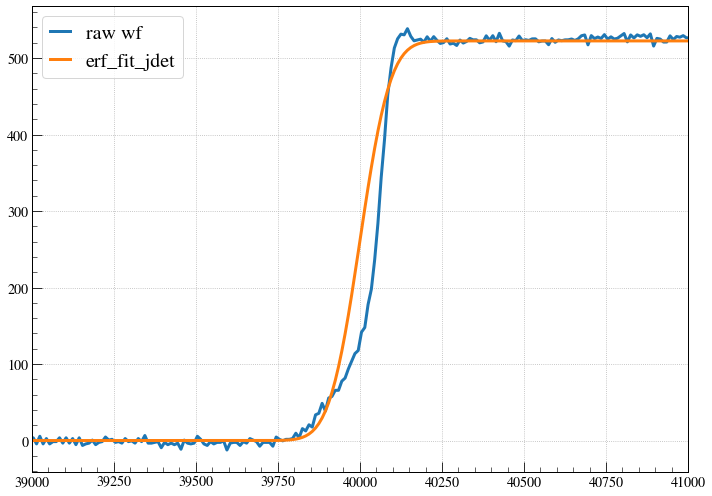

In [14]:
def erf_fit_jdet_pythonic(time, wf, pars_guess=[40000,10], fNSamplesToIntegrate=1000):
    #print(list(zip(time,wf))[0:10])
    iMu = int(pars_guess[0]/10)
    iSig = 7.27 # int(pars_guess[1]/10)
    
    #iMu = int(tp50/10)
    #iSig= int(sig/10)
    
    
    iMin = 0
    iMax = wf.shape[0]-1

    iMuLast = iMu
    iSigLast = iSig


    iMuMin = 3900
    iMuMax = 4200
    
    iSigMin = 0.1
    iSigMax = 200

    iMuTol = 2
    iSigTol = 2

    chi2 = 0
    
    fNIterMax = 20
    fNStepsToRamp = 0
    
    amp = np.mean(wf[wf.shape[0]-1-fNSamplesToIntegrate:wf.shape[0]-1])
    
    for iIter in range(fNIterMax):
    
        i = np.arange(iMin, iMax)
        x = (i- iMu)/iSig
        f = 0.5*(1+ scp.special.erf(x/np.sqrt(2)))
        d = wf[i]/amp - f
        chi2 = (d*d).sum()

        #g = np.exp(-x*x/2)
        gnorm = 1/np.sqrt(2*np.pi)/iSig
        g = np.exp(-x*x/2)/gnorm
        dg = (d*g).sum()
        dgx = (d*g*x).sum()
        dgx2 = (d*g*x*x).sum()
        dgx3 = (d*g*x*x*x).sum()
        g2 = (g*g).sum()
        g2x = (g*g*x).sum()
        g2x2 = (g*g*x*x).sum()

        #gnorm = 1/np.sqrt(2*np.pi)/iSig
        #g2 *= gnorm
        #g2x *= gnorm
        #g2x2 *= gnorm

        H11 = g2 + np.sqrt(2)*dgx/iSig
        H12 = np.sqrt(2)*(g2x + dgx2/iSig - dg/iSig)
        H22 = 2*(g2x2 + dgx3/iSig - 2*dgx/iSig)
        detH = H11*H22 - H12*H12

        stepDownFactor = 1

        if (iIter < fNStepsToRamp):
                stepDownFactor = 1 + fNStepsToRamp - iIter
                
        stepDownFactor = 1
        #iMu -= (H22*dg*np.sqrt(2) - H12*dgx*2)/detH/stepDownFactor
        iMu -= (np.sqrt(2)*dg/H11)
        if (iMu < iMuMin): iMu=iMuMin
        if (iMu >= iMuMax): iMu = iMuMax

        #iSig -= (-H12*dg*np.sqrt(2) + H11*dgx*2)/detH/stepDownFactor
        #if (iSig < iSigMin): iSig = iSigMin
        #if (iSig >= iSigMax): iSig = iSigMax
        
        print(iIter, iMu)
        
        if (abs(iMu-iMuLast) < iMuTol):# and (abs(iSig-iSigLast) < iSigTol):
            #if verbose: print('\niMu:',iMu, '\niMuLast:',iMuLast, '\niMuTol:',iMuTol)
            break
        iMuLast = iMu
        iSigLast = iSig
        
    return iMu*10, iSig*10, amp

    


mu_iminuit = df_hit['erf_fit_mu'][entries[0]]
sig_iminuit = df_hit['erf_fit_sig'][entries[0]]
amp_iminuit = df_hit['erf_fit_amp'][entries[0]]
print('erf_fit_iminuit:', mu_iminuit,sig_iminuit,amp_iminuit)



mu, sig, amp = erf_fit_jdet_pythonic(time,wf)#, pars_guess=[mu_iminuit,sig_iminuit])
print('erf_fit_jdet:',mu,sig,amp)




y = func(time, mu, sig)
#y_iminuit = func(time, mu_iminuit, sig_iminuit)
plt.plot(time,wf, label='raw wf')
plt.plot(time,(y)*amp, label='erf_fit_jdet')#pars:{:.1f},{:.1f}'.format(mu,sig))
#plt.plot(time,y_iminuit*amp_iminuit, label='erf_fit_iminuit')#pars:{:.1f},{:.1f}'.format(mu,sig))
plt.xlim(39000,41000)
plt.legend()

1 4006.974895250581
2 4000.171969500309
3 4000.3439390006197
erf_fit_jdet: 40003.4393900062 2.000000000017774 522.40247


(38000.0, 42000.0)

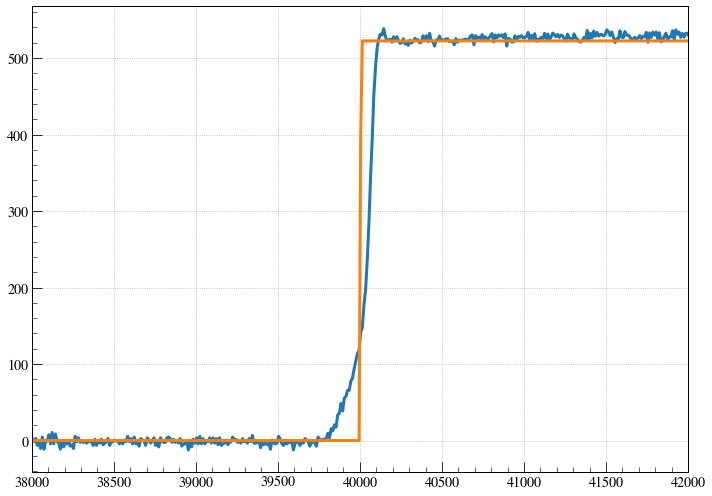

In [15]:
def erf_fit_jdet_edited(time, wf, pars_guess=[40000,10], fNSamplesToIntegrate=1000):
    #print(list(zip(time,wf))[0:10])
    iMu = int(pars_guess[0]/10)
    iSig = int(pars_guess[1]/10)
    
    #iMu = int(tp50/10)
    #iSig= int(sig/10)
    
    
    iMin = 0
    iMax = wf.shape[0]-1

    iMuLast = iMu
    iSigLast = iSig


    iMuMin = 3900
    iMuMax = 4200
    
    iSigMin = 0.1
    iSigMax = 200

    iMuTol = 2
    iSigTol = 2

    chi2 = 0
    
    fNIterMax = 20
    fNStepsToRamp = 0
    
    amp = np.mean(wf[wf.shape[0]-1-fNSamplesToIntegrate:wf.shape[0]-1])
    
    for iIter in range(fNIterMax):
        
        
    
        i = np.arange(iMin, iMax)
        x = (i- iMu)/iSig/np.sqrt(2)
        f = 0.5*(1+ scp.special.erf(x))
        d = wf[i]/amp - f
        #chi2 = (d*d).sum()

        
        gnorm = 1/np.sqrt(2*np.pi)/iSig
        g = np.exp(-x*x)*gnorm
        
        #H11
        g2 = (g*g).sum()
        dgx = (d*g*x).sum()
        
        
        #H12
        g2x = (g*g*x).sum()
        dg = (d*g).sum()
        dgx2 = (d*g*x*x).sum()
        
        
        #H22
        dgx3 = (d*g*x*x*x).sum()
        g2x2 = (g*g*x*x).sum()

        # gnorm = 1/np.sqrt(2*np.pi)/iSig
        # g2 *= gnorm
        # g2x *= gnorm
        # g2x2 *= gnorm
        
        
        
        
        H11 = 2*(g2 + np.sqrt(2)*dgx/iSig)
        
        H12 = 2*np.sqrt(2)*(g2x + np.sqrt(2)*dgx2/iSig - dg/iSig/np.sqrt(2))
        
        H22 = 4*(g2x2 + np.sqrt(2)*dgx3/iSig - np.sqrt(2)*dgx/iSig)
        
        detH = H11*H22 - H12*H12

        stepDownFactor = 1

        if (iIter < fNStepsToRamp):
                stepDownFactor = 1 + fNStepsToRamp - iIter
                
        stepDownFactor = 1
        #print(iMu)
        iMu -= (H22*dg*2 - H12*dgx*2*np.sqrt(2))/detH/stepDownFactor
        #print(iMu)
        #if (iMu < iMuMin): iMu=iMuMin
        #if (iMu >= iMuMax): iMu = iMuMax

        iSig -= (-H12*dg*2 + H11*dgx*2*np.sqrt(2))/detH/stepDownFactor
        if (iSig < iSigMin): iSig = iSigMin
        if (iSig >= iSigMax): iSig = iSigMax
        
        print(iIter+1, iMu)
        
        if (abs(iMu-iMuLast) < iMuTol) and (abs(iSig-iSigLast) < iSigTol):
            #if verbose: print('\niMu:',iMu, '\niMuLast:',iMuLast, '\niMuTol:',iMuTol)
            break
        iMuLast = iMu
        iSigLast = iSig
        
    return iMu*10, iSig*10, amp

    

mu, sig, amp = erf_fit_jdet_edited(time,wf)#, pars_guess=[mu_iminuit,sig_iminuit])
print('erf_fit_jdet:',mu,sig,amp)

plt.plot(time, wf, label='raw')
plt.plot(time, amp*func(time, mu, sig), label='erf_fit_jdet_edited')
plt.xlim(38000,42000)

4003


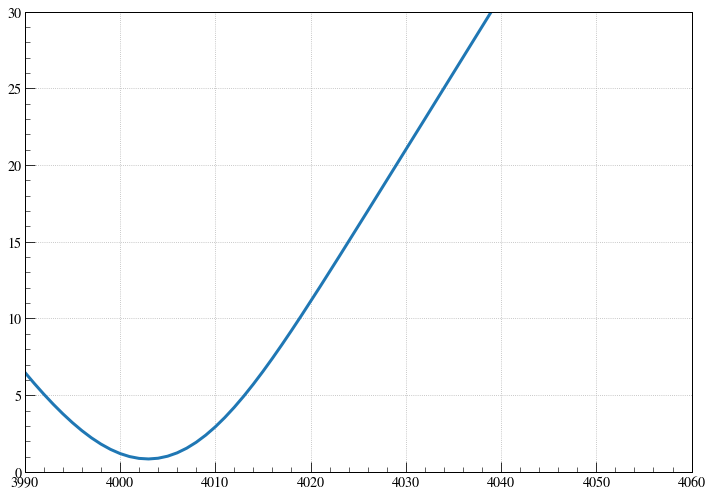

In [19]:
iMin = 0
iMax = wf.shape[0]-1

iMus = list(range(3900,4350))
chi2s = []

#iMu = 4005.8
iSig = 7.27
for iMu in iMus:
    i = np.arange(iMin, iMax)
    #print('i:',i)
    x = (i- iMu)/iSig
    #print('x:',x)
    f = 0.5*(1+ scp.special.erf(x/np.sqrt(2)))
    #print('f:',f)
    d = wf[i]/amp - f
    #print(d)
    chi2 = (d*d).sum()
    chi2s.append(chi2)
    #print(iMu, chi2)
#print(chi2)

#g = np.exp(-x*x/2)
#dg = (d*g).sum()
plt.plot(iMus, chi2s)
plt.xlim(3990,4060)
plt.ylim(0,30)
print(np.argmin(chi2s)+3900)

In [25]:
n = 4000
x1 = time[n]
x2 = time[n+1]
y1 = wf[n]
y2 = wf[n+1]
x = (x2*y1-x1*y2)/(y2-y1)
print(x)

-39884.9288166638


In [ ]:
cProfile.run('erf_fit_jdet_pythonic(time,wf)')

In [ ]:
def erf_fit_jdet(time, wf, iMu_start=39.85, iSig_start=0.1, fNSamplesToIntegrate=1000, verbose = False):
    iMu = int(iMu_start*100)
    iSig = int(iSig_start*100)


    iMin = 0
    iMax = wf.shape[0]-1

    iMuLast = iMu
    iSigLast = iSig


    iMuMin = 3900
    iMuMax = 4200

    iSigMin = 0.1
    iSigMax = 200

    iMuTol = 2
    iSigTol = 2

    chi2 = 0
    
    fNIterMax = 20
    fNStepsToRamp = 5
    
    #fNSamplesToIntegrate = wf.shape[0]-1
    
    #fNSamplesToIntegrate = wf.shape[0]-1
    
    amp = np.mean(wf[wf.shape[0]-1-fNSamplesToIntegrate:wf.shape[0]-1])
    for iIter in range(fNIterMax):
        if verbose: print('iMu,iSig',iMu,iSig)
        y = func(time, iMu/100, iSig/100)
        if verbose: plt.plot(time,(y+1)*amp, label='iter {:.0f}: {:.2f}, {:.2f}'.format(iIter,iMu/100,iSig/100))

        dg = 0
        dgx = 0
        dgx2 = 0
        dgx3 = 0
        g2 = 0
        g2x = 0
        g2x2 = 0

        chi2 = 0
        if verbose: 
            print('\niIter:', iIter)
            print(iMin,iMax)
        dg_arr = []
        chi2_arr = []
        for i in range(iMin,iMax):
            x = (i-iMu)/iSig #shifting the parameters of fit
            f = 0.5*(1+ scp.special.erf(x/np.sqrt(2)))
            d = wf[i]/amp - f
            chi2 += d*d
            #if (i%1000==0): print(i)

            g = np.exp(-x*x/2)
            dg += d*g
            dg_arr.append(d*g)
            dgx += d*g*x
            dgx2 += d*g*x*x
            dgx3 += d*g*x*x*x
            g2 += g*g
            g2x += g*x*x
            g2x2 += g*g*x*x

        dg = sum(dg_arr)
        if verbose: print('chi2:',chi2)
        gnorm = 1/np.sqrt(2*np.pi)/iSig
        g2 *= gnorm
        g2x *= gnorm
        g2x2 *= gnorm

        H11 = g2 + dgx/iSig
        H12 = g2x + dgx2/iSig - dg/iSig
        H22 = g2x2 + dgx3/iSig - 2*dgx/iSig
        detH = H11*H22 - H12*H12

        stepDownFactor = 1
        if verbose: plt.plot(time[:-1], dg_arr, label='dg{}'.format(iIter))

        if (iIter < fNStepsToRamp):
            stepDownFactor = 1 + fNStepsToRamp - iIter

        if verbose: 
            print('\nstepDownFactor:',stepDownFactor, '\nH22:',H22, '\nH12:',H12, '\ndg:',dg, '\ndgx:',dgx, '\ndetH:',detH)
        iMu -= (H22*dg - H12*dgx)/detH/stepDownFactor
        if (iMu < iMuMin): iMu=iMuMin
        if (iMu >= iMuMax): iMu = iMuMax

        iSig -= (-H12*dg + H11*dgx)/detH/stepDownFactor
        if (iSig < iSigMin): iSig = iSigMin
        if (iSig >= iSigMax): iSig = iSigMax

        if (abs(iMu-iMuLast) < iMuTol) and (abs(iSig-iSigLast) < iSigTol):
            if verbose: print('\niMu:',iMu, '\niMuLast:',iMuLast, '\niMuTol:',iMuTol)
            break
        iMuLast = iMu
        iSigLast = iSig
        
    return iMu/100, iSig/100, amp

mu, sig, amp = erf_fit_jdet(time, wf)
print(mu, sig, amp)
#plt.plot(time, wf)
#plt.plot(time, func2(time, mu*1000, sig*1000, amp))
#plt.xlim(38000,42000)

## scipy curve_fit

In [ ]:
def erf_fit_scipy(time, wf, fNSamplesToIntegrate=1000, p0=[40000,10]):
    #fNSamplesToIntegrate = wf.shape[0]-1
    amp = np.mean(wf[wf.shape[0]-1-fNSamplesToIntegrate:wf.shape[0]-1])
    pars, covs = curve_fit(func,time,(wf/amp), p0)
    
    return pars[0],pars[1],amp

erf_fit_scipy(time, wf)

In [ ]:
def erf_fit_scipy_2(time, wf, p0=[40000,10,500]):
    #fNSamplesToIntegrate = wf.shape[0]-1
    #amp = np.mean(wf[wf.shape[0]-1-fNSamplesToIntegrate:wf.shape[0]-1])
    pars, covs = curve_fit(func2,time,wf)
    
    return pars[0],pars[1],pars[2]

erf_fit_scipy_2(time,wf) 
#ns, ns, ADC

In [ ]:
cProfile.run('erf_fit_scipy_2(time,wf)')

## iminuit

In [97]:
from jax.scipy.special import erf
from iminuit import Minuit
from iminuit.cost import LeastSquares
from jax.scipy.stats.norm import cdf

In [ ]:
plt.plot(time, wf)
plt.xlim(38000,42000)

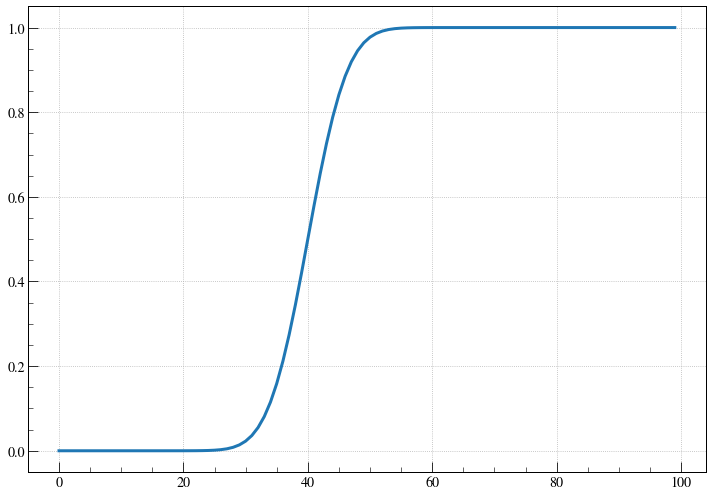

In [86]:
x = np.arange(0,100)
y = cdf(x,40,5)
plt.plot(x,y)

### iminuit fitting for 1 wf

In [112]:
def func_iminuit(x,mu,sig):
    return 0.5*(1+erf((x-mu)/(sig*np.sqrt(2))))

def integral(x, mu, sig):
    e = erf((x-mu)/(sig*np.sqrt(2)))
    return x*e + np.exp(-x*x)



def erf_fit_iminuit(time, wf, samples_to_integrate=1000, mu=40000, sig=10, ydata_err = 0.1):
    #time = np.linspace(0, wf_in.shape[0]*10, wf_in.shape[0])
    #samples_to_integrate = 1000
    amp = np.mean(wf[wf.shape[0]-1-samples_to_integrate:wf.shape[0]-1])
    #amp = np.mean(wf_in)
    wf = wf/amp
    
    
    ydata_err = ydata_err #assuming uniform throughout the whole wf
    least_squares = LeastSquares(time, wf, ydata_err, func)
    #c = ExtendedBinnedNLL(wf, time, func)
    m = Minuit(least_squares, mu=mu, sig=sig)
    m.migrad()
    
    return m.values['mu'], m.values['sig'], amp
tic = t.time()
p = erf_fit_iminuit(time, wf)
toc = t.time()

print(p)

print(toc-tic)


(40395.31123214827, 75.71001449436376, 1.0)
0.02368950843811035


In [106]:
from iminuit.cost import ExtendedBinnedNLL

In [ ]:
cProfile.run('erf_fit_iminuit(time,wf)')

In [116]:

def erf_fit_iminuit_2(time, wf, mu=40000, sig=10, amp=500):
    ls = LeastSquares(time, wf, 0.1, func2)
    m = Minuit(ls, mu=mu, sig=sig, amp=amp)
    m.migrad()
    return m.values['mu'], m.values['sig'], m.values['amp']

tic = t.time()
mu, sig, amp = erf_fit_iminuit_2(time, wf)
toc = t.time()
print(mu,sig,amp)
print(toc-tic)

1153732.7469321743 3244.524432492993 0.9956647400289285
0.03889799118041992


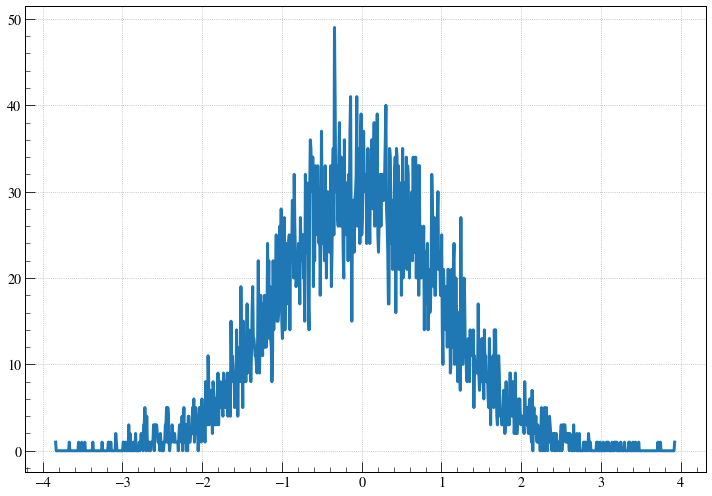

In [89]:
rng = np.random.default_rng(seed=1)
n, xe = np.histogram(rng.normal(size=10000), bins=1000)
plt.plot(xe[:-1],n)

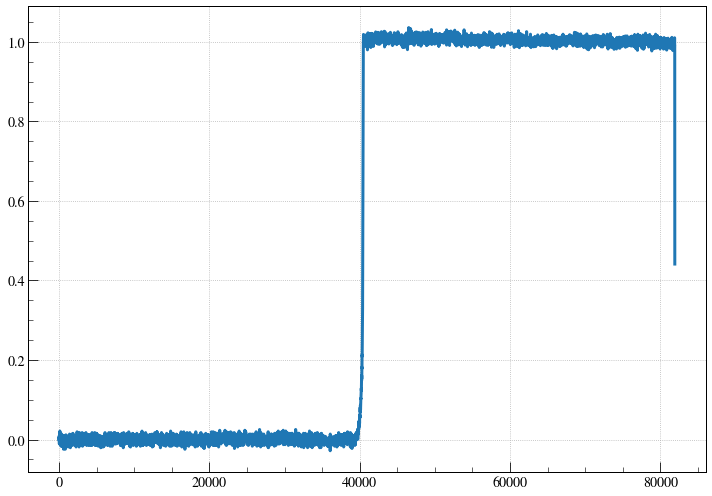

In [101]:
samples_to_integrate = 1000
amp = np.mean(wf[wf.shape[0]-1-samples_to_integrate:wf.shape[0]-1])
wf = wf/amp
plt.plot(time,wf)

In [104]:
m = Minuit(func_iminuit, (40000,10,500), grad=None)

TypeError: func_iminuit() missing 2 required positional arguments: 'mu' and 'sig'

### bulk iminuit fitting

In [ ]:
time = np.linspace(0,81920, 8192)
wfs = [wf_browser.wf_data[0][i][1] for i in entries]
for i in entries:
    plt.plot(time,wfs[i])
    wf_in = wfs[i]
    time = np.linspace(0, wf_in.shape[0]*10, wf_in.shape[0])
    samples_to_integrate = 1000
    amp = np.mean(wf_in[wf_in.shape[0]-1-samples_to_integrate:wf_in.shape[0]-1])
    #amp = np.mean(wf_in)
    wf_in = wf_in/amp
    
    
    ydata_err = 0.1 #assuming uniform throughout the whole wf
    least_squares = LeastSquares(time, wf_in, ydata_err, func)
    m = Minuit(least_squares, mu=40000, sig=10)
    m.migrad()
    
    print('mu:',m.values['mu'], 'sig:', m.values['sig'], 'amp:',amp, 'trapEmax:',df_hit['trapEmax'][i])
    plt.xlim(38000,42000)

### scp.special.erf vs jax.scipy.special.erf

In [ ]:
x = np.arange(-10,10,0.1)
n = 1000
#y = erf(x)
scipy_time = []
jax_scipy_time = []
for _ in range(n):
    start = t.time()
    y = scp.special.erf(x)
    end = t.time()
    scipy_time.append(end-start)
    start = t.time()
    y = erf(x)
    end = t.time()
    jax_scipy_time.append(end-start)
    
    
plt.plot(x,y)
print(np.sum(scipy_time))
print(np.sum(jax_scipy_time))

In [ ]:
def func_iminuit(mu, sig, amp):
    z = (time-mu)/sig/np.sqrt(2)
    y = amp*0.5*(1+scp.special.erf(z))
    chi2 = 0
    for i in range(wf.shape[0]):
        chi2 = chi2 + (wf[i]-y[i])**2
        
    return chi2
    

func_iminuit.errordef = Minuit.LEAST_SQUARES
m = Minuit(func_iminuit, mu=40000, sig=200, amp=60)
m.migrad()


In [ ]:
plt.plot(time, wf)
plt.plot(time, func2(time, m.values['mu'], m.values['sig'], m.values['amp']))
#plt.plot(time, func2(time, erf_fit_scipy_2(time, wf)))
start = t.time()
pars, covs = curve_fit(func2, time, wf, p0=[40000, 10, 450])
end = t.time()
print(end-start)
plt.plot(time, func2(time, pars[0], pars[1], pars[2]))

plt.xlim(38000,42000)

## comparisons

In [ ]:
print('jdet:', erf_fit_jdet_pythonic(time, wf))
print('scipy:', erf_fit_scipy(time, wf))
print('scipy_with_amp_as_parameter', erf_fit_scipy_2(time, wf))

In [ ]:
#raw_wf
plt.plot(time,wf, label='raw wf')


#scipy fit
start = t.time()
mu ,sig, amp = erf_fit_scipy(time,wf)
end = t.time()
print('scipy:',mu,sig,amp, 'time(s):', end-start)
#print('Time elapsed (scipy): {:0.5f} s'.format(end-start))

y = func(time, mu, sig)
y=y*amp
plt.plot(time,y, label='scipy curve_fit')



#scipy fit with fitting amplitude
start = t.time()
mu ,sig, amp = erf_fit_scipy_2(time,wf)
end = t.time()
print('scipy 2:',mu,sig,amp, 'time(s):', end-start)
#print('time elapsed (s):',end-start)
y = func2(time,mu,sig,amp)
plt.plot(time,y,label='scipy fit with variable amplitude')




#jdet_fit
start = t.time()
mu, sig, amp = erf_fit_jdet_pythonic(time,wf)
end = t.time()
print('jdet:',mu,sig,amp, 'time(s):', end-start)
#print('Time elapsed (jdet): {:0.5f} s'.format(end-start))

y = func(time, mu, sig)
y *= amp
plt.plot(time,y, label='erf_fit_jdet')


#iminuit
start = t.time()
mu, sig, amp = erf_fit_iminuit(time, wf)
end = t.time()
print('iminuit:', mu, sig, amp, 'time(s):',end-start)
plt.plot(time, amp*func(time, mu, sig), label='iminuit')


#iminuit_2
start = t.time()
mu, sig, amp = erf_fit_iminuit_2(time, wf)
end = t.time()
print('iminuit_2:', mu, sig, amp, 'time(s):',end-start)
plt.plot(time, func2(time, mu, sig, amp), label='iminuit_2')




plt.xlabel('time (us)')
plt.ylabel('ADC')
plt.title('E_cal:'+str(e_cal_range)+'\nbl:'+str(bl_range))
plt.legend()
plt.xlim(mu-1000,mu+1000)
#plt.ylim(50,70)

### bulk fitting

In [ ]:
(ene_cut&bl_cut).sum()

In [ ]:
cut_indices[0:10]

In [ ]:
time[0:10]

In [ ]:
def bulk():
    

    wf_browser.clear_data()
    wf_browser.find_entry(0)
    time = wf_browser.wf_data[0][0][0]


    mus, sigmas, amps = [],[],[]

    loading_time = 0
    fitting_time = 0

    count = 0
    
    cut_indices_2 = cut_indices[0:2700]

    for cut_index in cut_indices_2:
        if count%1000==0: print('{:.2f} %'.format(count/len(cut_indices)*100))
        count += 1
        try:

            wf_browser.clear_data()

            start = t.time()
            wf_browser.find_entry(cut_index)
            wf = wf_browser.wf_data[0][0][1]
            end = t.time()
            loading_time += (end-start)

            start = t.time()
            mu, sig, amp = erf_fit_scipy_2(time,wf)
            end = t.time()
            fitting_time += (end-start)

            mus.append(mu)
            sigmas.append(sig)
            amps.append(amp)
        except:
            mus.append(None)
            sigmas.append(None)
            amps.append(None)

    total_time = loading_time + fitting_time
    print('Total time  : {:.10f} s'.format(total_time))
    print('Loading time: {:.10f} s ({:.2f}%)'.format(loading_time, loading_time/total_time*100))
    print('Fitting time: {:.10f} s ({:.2f}%)'.format(fitting_time, fitting_time/total_time*100))
    
    return mus, sigmas, amps
    
    
mus, sigmas, amps = bulk()

In [ ]:
amps = list(filter(None, amps))
amps_converted = np.polyval(current_pars, amps)


plt.figure(figsize=(15,12))



n = plt.hist(df_hit['trapEmax_cal'][cut_indices[0:2700]], bins=50, histtype='step', label='trap filter energy estimatation')

n2 = plt.hist(amps_converted, bins=50, histtype='step', range=(225,230), label= 'scipy amplitude fitted energy estimation')

plt.legend()
plt.xlabel('KeV')
plt.ylabel('Count')
plt.title('Kr(run3)'+'\n'+str(bl_range)+'\n'+str(e_cal_range))
print('within [225,235] using amp fitting: {:.2f}%'.format(n2[0].sum()/n[0].sum()*100))

In [ ]:
a = plt.hist2d(df_hit['trapEmax_cal'][cut_indices[0:2700]],amps_converted, bins=[50,500])
#n2 = plt.hist(amps_converted, bins=50, histtype='step', range=(225,230), label= 'scipy amplitude fitted energy estimation', color='r')

plt.legend()
plt.ylim(220,235)
plt.xlabel('trap filter estimated energy')
plt.ylabel('erf fit estimated energy')
plt.title(str(e_cal_range))
plt.colorbar()

In [ ]:
wf_browser.clear_data()
nwfs = 10


cut_indices = list(compress(list(range(len(cut))),cut))


#entries = cut_indices[0:nwfs]
#entries = cut_indices
entries = np.random.choice(cut_indices, size=nwfs).tolist()

wf_browser.find_entry(0)
time = wf_browser.wf_data[0][0][0]


scipy_loading_time = 0
scipy_fitting_time = 0

jdet_loading_time = 0
jdet_fitting_time = 0

for entry in entries:
    wf_browser.clear_data()
    #loading
    start = t.time()
    wf_browser.find_entry(entry)
    wf = wf_browser.wf_data[0][0][1]
    end = t.time()
    scipy_loading_time += (end-start)
    
    #scipy fit
    start = t.time()
    mu ,sig, amp = erf_fit_scipy(time, wf)
    end = t.time()
    
    print('scipy:',mu,sig,amp)
    scipy_fitting_time += (end-start)
    
    #jdet_fit
    start = t.time()
    mu, sig, amp = erf_fit_jdet(time, wf)
    end = t.time()
    print('jdet:',mu,sig,amp)
    jdet_fitting_time += (end-start)
    
    
print('loading time: {:.5f}'.format(scipy_loading_time))
print('scipy_fitting_time: {:.5f} s'.format(scipy_fitting_time))
print('jdet_fitting_time: {:.5f} s'.format(jdet_fitting_time))
    
    
    


In [ ]:
wf_browser.clear_data()
nwfs = 10


cut_indices = list(compress(list(range(len(cut))),cut))


#entries = cut_indices[0:nwfs]
#entries = cut_indices
entries = np.random.choice(cut_indices, size=nwfs).tolist()

start = t.time()
wf_browser.find_entry(entries)
end = t.time()
print(end-start)
#print('whats going on?')


#wfs = wf_browser.wf_data[0]   

start = t.time()

t1, t2 = 0,0

parss, amps, e = [],[],[]
#count = 0
for i in range(len(entries)):
    try:
        if (i%1000==0): 
            end = t.time()
            elapsed_time = end - start
            print('{:.1f}'.format(i/len(entries)*100)+'%','Elapsed time: {:.2f} mins'.format(elapsed_time/60))

        start = t.time()
        wf_browser.find_entry(entries[i])
        end = t.time()
        t1 += (end-start)
        time = wf_browser.wf_data[0][i][0]
        wf = wf_browser.wf_data[0][i][1]
        fNSamplesToIntegrate = wf.shape[0]-1
        #normalizing the wf btwn [0:1]
        amp = np.mean(wf[wf.shape[0]-fNSamplesToIntegrate:wf.shape[0]])
        wf= wf/amp
        start = t.time()
        pars, covs = curve_fit(func,time,wf-1)
        end = t.time()
        t2 += (end-start)
        #plt.plot(time,wff_normalized)
        parss.append(pars)
        amps.append(amp)
        e.append(entries[i])
        #covss.append(covs)
    except:
        parss.append(None)
        amps.append(None)
        e.append(entries[i])
end = t.time()
elapsed_time = end - start

print('Elapsed time:',elapsed_time/60,'mins')
sigs = [pars[1] for pars in parss]
ecals = df_hit['trapEmax_cal'][entries]

print(len(sigs),len(ecals))
print(t1, t2)

In [ ]:
wf_browser.clear_data()
nwfs = 100

cut_indices = list(compress(list(range(len(cut))),cut))

entries = np.random.choice(cut_indices, size=nwfs).tolist()

start = t.time()
wf_browser.find_entry(entries)
end = t.time()
print("all at once:", end-start)
#print('whats going on?')




#wfs = wf_browser.wf_data[0]   

# start = t.time()
# for i in range(len(entries)):
#         wf_browser.find_entry(entries[i])
# end = t.time()
# elapsed_time = end - start

# print('Elapsed time:',elapsed_time,'mins')

In [ ]:
beginning_cyc = 2019
cyc_range = [2039,2058, 'kr', 'run3']

tb_name_dsp = 'ORSIS3302DecoderForEnergy/dsp'

lh5_dir = dg.lh5_dir
dsp_list = lh5_dir + dg.fileDB['dsp_path'] + '/' + dg.fileDB['dsp_file']
hit_list = dsp_list[cyc_range[0]-beginning_cyc:cyc_range[0]-beginning_cyc+3]
current_pars = [0.430, -0.09979]
bl_range = [58000,58200, 'ADC']
ene_range = [25,30, 'KeV']
cut_indexes = []
for hit_file in hit_list:
    df_hit = lh5.load_dfs(hit_file, ['trapEmax','bl'], tb_name_dsp)
    df_hit['trapEmax_cal'] = np.polyval(current_pars, df_hit['trapEmax'])
    
    bl_cut =(df_hit['bl']>bl_range[0]) & (df_hit['bl']<bl_range[1]) 
    ene_cut = (df_hit['trapEmax_cal']>e_cal_range[0]) & (df_hit['trapEmax_cal']<e_cal_range[1])
    cut = bl_cut & ene_cut
    print(cut.sum())
    cut_indices = list(compress(list(range(len(cut))),cut))

In [ ]:
dsp_list[cyc_range[0]-beginning_cyc]

In [ ]:
beginning_cyc = 2019
cyc_range = [2039,2058, 'kr', 'run3']

tb_name_dsp = 'ORSIS3302DecoderForEnergy/dsp'

lh5_dir = dg.lh5_dir
dsp_list = lh5_dir + dg.fileDB['dsp_path'] + '/' + dg.fileDB['dsp_file']
raw_store = lh5.Store()


current_pars = [0.430, -0.09979]
bl_range = [58000,58200, 'ADC']
ene_range = [25,30, 'KeV']



for cyc in range(cyc_range[0],cyc_range[0]+1):
    hit_file = dsp_list[cyc-beginning_cyc]
    df_hit = lh5.load_dfs(hit_file, ['trapEmax','bl'], tb_name_dsp)
    df_hit['trapEmax_cal'] = np.polyval(current_pars, df_hit['trapEmax'])
    
    bl_cut =(df_hit['bl']>bl_range[0]) & (df_hit['bl']<bl_range[1]) 
    ene_cut = (df_hit['trapEmax_cal']>e_cal_range[0]) & (df_hit['trapEmax_cal']<e_cal_range[1])
    cut = bl_cut & ene_cut
    print(cut.sum())
    cut_indices = list(compress(list(range(len(cut))),cut))          
    
    raw_file = '/global/cfs/cdirs/legend/data/krstc/LH5/raw/krstc_'+cyc_range[3]+'_cyc'+str(cyc)+'_raw.lh5'
    
    data_raw, nrows = raw_store.read_object(tb_name_raw, raw_file, idx=cut_indices)
    bulk_wfs = data_raw['wf_pz']['values'].nda
    c = 0
    for wf in bulk_wfs:
        if c<5: plt.plot(time,wf)
        c += 1
    

In [ ]:
for wf in bulk_wfs[0:10]:
    print(wf.shape)

In [ ]:
beginning_cyc = 2019
cyc_range = [2039,2058, 'kr', 'run3']

raw_files = []
tb_name_raw = 'ORSIS3302DecoderForEnergy/raw'
for cyc in range(cyc_range[0],cyc_range[0]+3):
    raw_file = '/global/cfs/cdirs/legend/data/krstc/LH5/raw/krstc_'+cyc_range[3]+'_cyc'+str(cyc)+'_raw.lh5'
    

print(raw_files)

start = t.time()
raw_store = lh5.Store()
data_raw, nrows = raw_store.read_object(tb_name_raw, raw_files, idx=cut_indexes)
bulk_wfs = data_raw['waveform']['values'].nda
end = t.time()
print('Elapsed time (using read_object):',(end-start),'s')

In [ ]:
bulk_wfs[0]

In [ ]:
nwfs = 10
cut_indices = list(compress(list(range(len(cut))),cut))
%timeit -n 2 -r 5 wf_browser.find_entry(entries)

In [ ]:
%timeit [i for i in range(100)]

In [ ]:
%timeit -n 1000 -r 20 [i for i in range(100)]

In [ ]:
%timeit -n 2 -r 5 wf_browser.find_entry(entries)

In [ ]:
entries

In [ ]:
wf_browser.clear_data()
nwfs = 10
cut_indices = list(compress(list(range(len(cut))),cut))
entries = np.random.choice(cut_indices, size=nwfs).tolist()

def erf_fit(i):
    try:
        if (i%1000==0): 
            #end = t.time()
            #elapsed_time = end - start
            print('{:.1f}'.format(i/len(entries)*100)+'%')

        wf_browser.find_entry(entries[i])
        time = wf_browser.wf_data[0][i][0]
        wf = wf_browser.wf_data[0][i][1]
        fNSamplesToIntegrate = wf.shape[0]-1
        #normalizing the wf btwn [0:1]
        amp = np.mean(wf[wf.shape[0]-fNSamplesToIntegrate:wf.shape[0]])
        wf= wf/amp
        pars, covs = curve_fit(func,time,wf-1)
        #plt.plot(time,wff_normalized)
        #parss.append(pars)
        #amps.append(amp)
        #e.append(entries[i])
        #covss.append(covs)
        mu = pars[0]
        sig = pars[1]
        entry = entries[i]
    except:
        #parss.append(None)
        #amps.append(None)
        #e.append(entries[i])
        mu = None
        sig = None
        entry = entries[i]
    return entry, mu, sig, amp


x = map(erf_fit, range(nwfs))

## E_cal vs erf_fig_sigma 2D hist

In [ ]:
n = plt.hist(sigs, bins=500, range=(0,1))
plt.xlabel('sigma of erf fit of wfs')
print('{:.1f}'.format(n[0].sum()/len(sigs)*100)+'%')

In [ ]:
plt.hist2d(ecals, sigs, bins=[100,100], range=[[0,50],[-0.25,1.0]])
plt.colorbar()
plt.clim(0,20)
plt.xlabel('E_cal (keV)')
plt.ylabel('sigma of erf fit to wfs')
plt.title('kr,run3'+'\nE_cal:'+str(e_cal_range)+'\nbl:'+str(bl_range))

## numbafying

In [ ]:
from numba import jit
@jit(nopython=True)
def rand_sum(x):
    s = 0
    for _ in range(x):
        s += np.random.uniform(0,1)
        
    return s
   
start = t.time()
rand_sum(100000)
end = t.time()
print(end-start)

In [ ]:
a = np.array([1.0, 2.0, 4.5])
type(a[0])

In [ ]:
from numba import guvectorize


@guvectorize(['(float64[:], float64, float64[:])'], '(n),()->(n)' ,nopython=True)
def multiply(x,n, res):
    for i in range(x.shape[0]):
        res[i] = x[i]*n
        

# start = t.time()
# #s = 0
# rand_sum(10)
# end = t.time()
# print(end-start)
# print(s)

In [ ]:
b = multiply(a, 8.0)
b

In [ ]:
from pygama.io.raw_to_dsp import build_processing_chain






def load_wf_pz():
    lh5_st = lh5.Store(keep_open=False)
    lh5_group = tb_name_raw
    files_in = raw_files[0]
    database = None
    outputs = ['waveform']
    block_width = 8
    
    dsp_config=os.path.expandvars('$HOME/KrSTC/data/meta/config_dsp.json')


    lh5_in = lh5_st.get_buffer(lh5_group, files_in)
    
    
    buffer_len = 128 #number of wfs to keep in memory at a time
    lh5_in = lh5_st.get_buffer(lh5_group, files_in, buffer_len)
    
    proc_chain, field_mask, lh5_out = build_processing_chain(lh5_in, 
                                                             dsp_config, 
                                                             db_dict = database, 
                                                             outputs=outputs, 
                                                             verbosity=True, 
                                                             block_width=block_width)
    
    return lh5_out
    
out = load_wf_pz()

In [ ]:
wf = out['waveform'].nda[0]
plt.plot(time,wf)

In [ ]:
a = [0,2]


In [ ]:
from numba import guvectorize


@guvectorize(['void(float32[:], float64, float64, float64)'], '(n)->(),(),()')
def erf_fit_iminuit(wf_in, mu=40000, sig=10, amp=400):
    time = np.linspace(0, wf_in.shape[0]*10, wf_in.shape[0])
    samples_to_integrate = 1000
    amp = np.mean(wf_in[wf_in.shape[0]-1-samples_to_integrate:wf_in.shape[0]-1])
    #amp = np.mean(wf_in)
    wf_in = wf_in/amp
    
    
    ydata_err = 0.1 #assuming uniform throughout the whole wf
    least_squares = LeastSquares(time, wf_in, ydata_err, func)
    m = Minuit(least_squares, mu=mu, sig=sig)
    m.migrad()
    
    mu = m.values['mu']
    sig = m.values['sig']

In [ ]:
erf_fit_iminuit(wf, mu, sig, amp)